# _Getting Start with Kaggle_

This notebook was adapted from Dataquest's Getting Started with Kaggle series.

In [50]:
# import pandas 
import pandas as pd
pd.set_option('display.max_columns', None)

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# calculate the num of rows and columns in train & test
train_shape = train.shape
test_shape = test.shape

print(train_shape, test_shape)

(891, 12) (418, 11)


In [51]:
# check out train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# check out test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### _Data Dictionary: Info on Each Column_

- `PassengerID` - A column added by Kaggle to identify each row and make submissions easier
- `Survived` - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- `Pclass` - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- `Sex` - The passenger's sex
- `Age` - The passenger's age in years
- `SibSp` - The number of siblings or spouses the passenger had aboard the Titanic
- `Parch` - The number of parents or children the passenger had aboard the Titanic
- `Ticket` - The passenger's ticket number
- `Fare` - The fare the passenger paid
- `Cabin` - The passenger's cabin number
- `Embarked` - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

We will be making predictions about whether or not a passenger survived, which is a binary classification problem (i.e. there are two outcomes). 

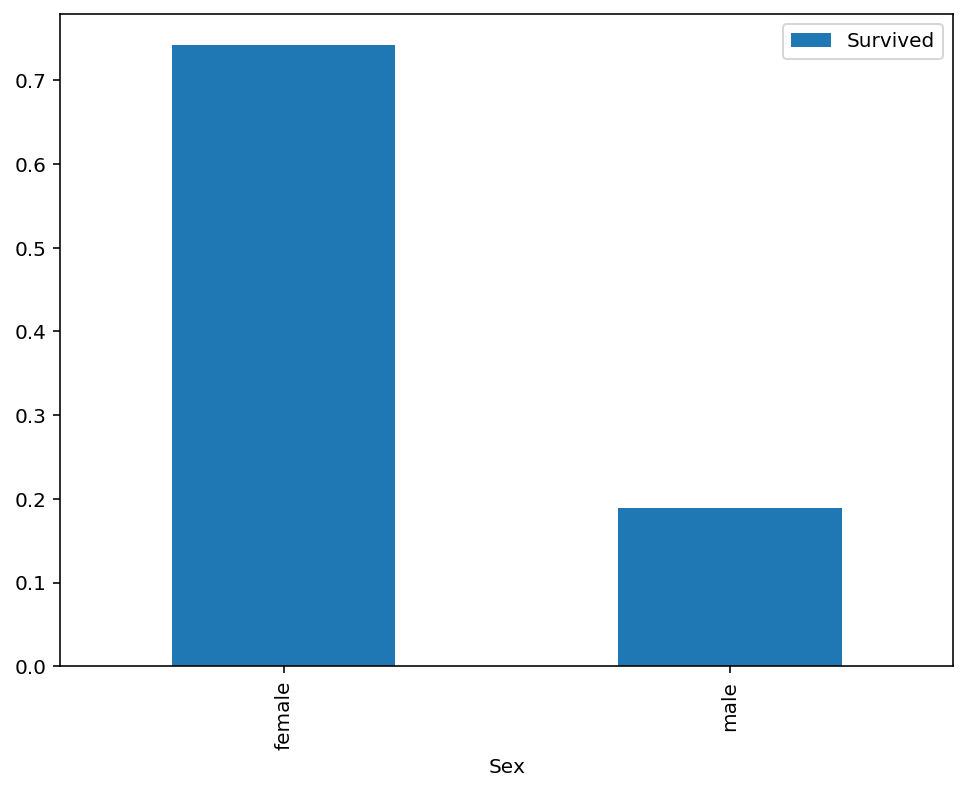

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# see the survival rates for each sex
sex_pivot = train.pivot_table(index='Sex', values='Survived')

# plot sex_pivot
sex_pivot.plot(kind = 'bar', figsize=(8,6));

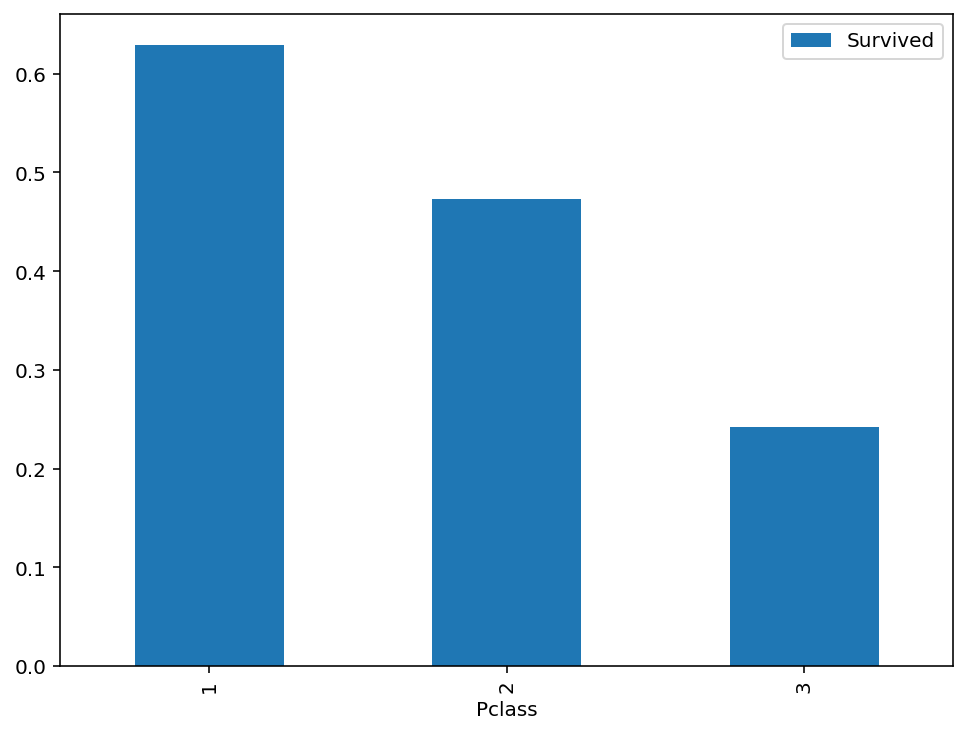

In [54]:
# do the same as above but with passenger class
train.pivot_table(index='Pclass', values='Survived').plot.bar(figsize=(8,6));

In [55]:
# let's take a look at the Age column
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

There are 714 values in the `Age` column which is fewer than the 891 rows in `train`. This indicates that we are going to have to address missing values.

Additionally `Age` is a continuous numerical column, as compared to the categorical columns of `Sex` and `PClass`. A way to look at the distribution on `Age` would be to use a histogram. Let's create two histograms to visually compare the ages of those that survived versus those that did not. 

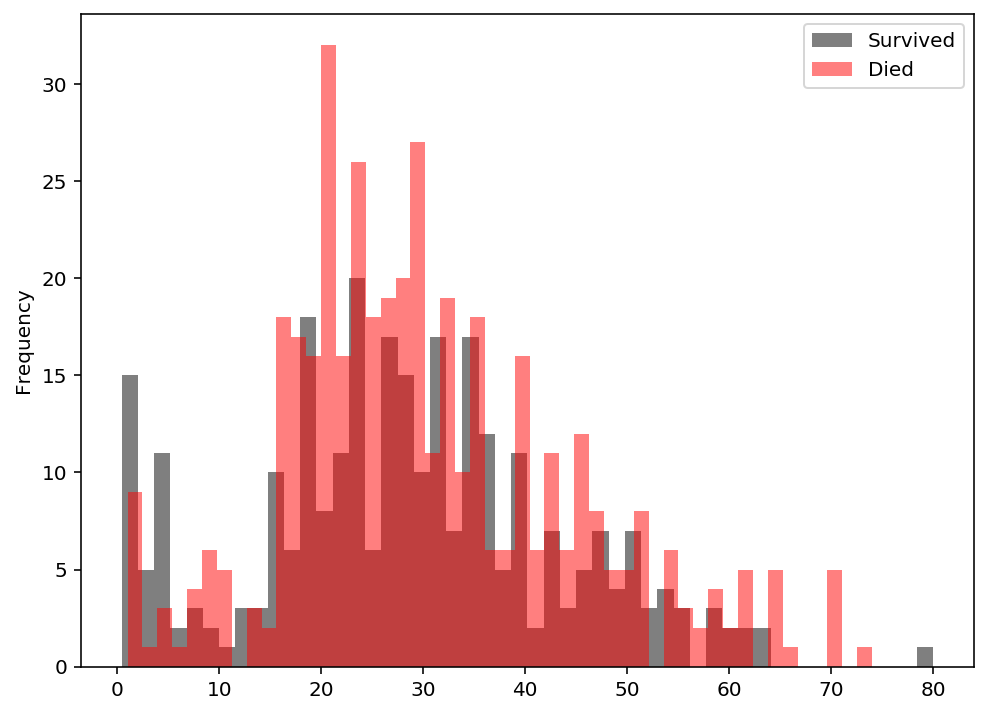

In [56]:
# subset of all passengers that survived
survived = train[train['Survived'] == 1]

# subset of all passengers that did not survive
died = train[train['Survived'] == 0]

# set figsize
plt.figure(figsize=(8,6))

# histogram of the ages of passengers that survived
survived['Age'].plot.hist(alpha=0.5, color='black', bins=50)

# histogram of the age distribution for passengers that did not survive
died['Age'].plot.hist(alpha=0.5, color='red', bins=50)

#plot legend
plt.legend(['Survived', 'Died']);

Upon closer examination, we can see that there are certain ages where there are spikes in the number that survived/did not survive. To help us get a better idea of what is going on, let's use the [`pandas.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) which allows us to separate continuous features into ranges, thus making them categorical. 

Additionally, we have to remember that any changes we make to the `train` data we also need to make to the `test` data. And we also need to address the missing values we observed earlier. 

We can do this by creating a function called `process_age` which will data as input our dataframe, age cut-offs and the corresponding labels and return an updated dataframe. 

In [57]:
# create process_age function
def process_age(df, cut_points, label_names):
    # fill in missing numbers for Age column
    df['Age'] = df['Age'].fillna(-0.5)
    # using cut, segment observations into age categories
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels = label_names)
    return df

In [58]:
# create list of age cut-offs
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# apply process_age function to train and test
train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult


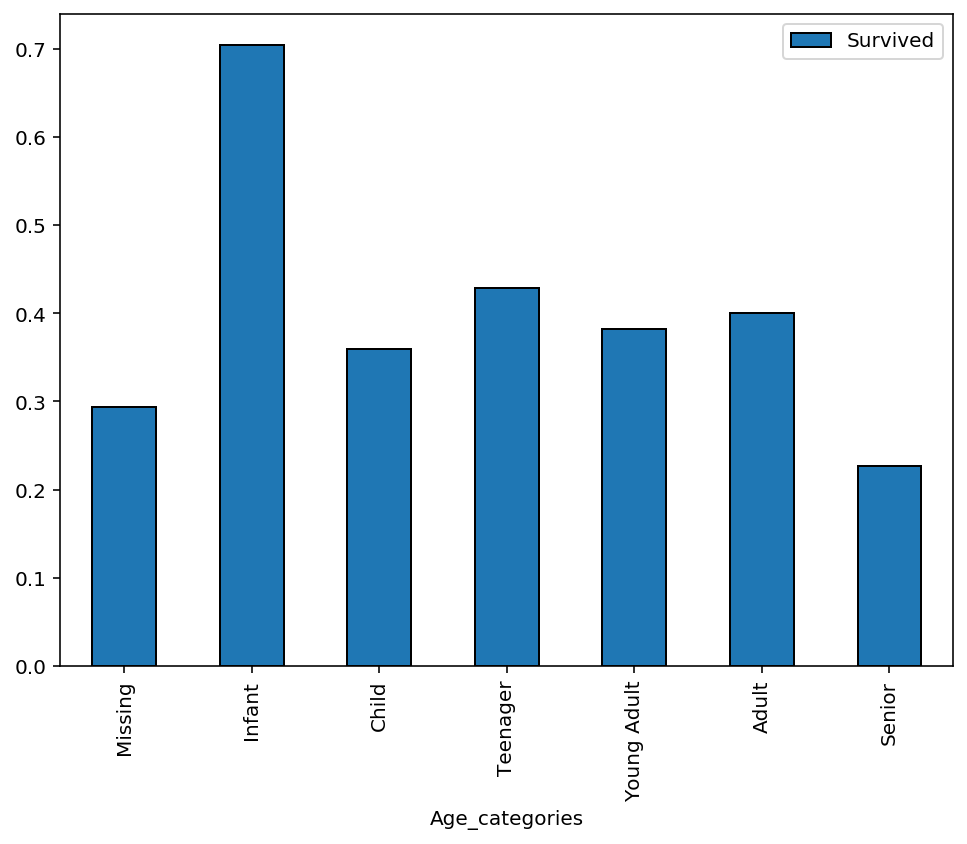

In [61]:
# plot distribution of age categories
train.pivot_table(index='Age_categories', values='Survived').plot.bar(figsize=(8,6), edgecolor='black');

The following three columns may be useful for predicting survival:
- `Sex`
- `Pclass`
- `Age`, or more specifically `Age_categories`

Now we need to prepare these columns for machine learning. Most ML algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful so that we don't imply any numeric relationship where there isn't one, like for example with `Pclass`. They are just labels essentially and don't relay in numeric information as to the relationship between the different classes. In our case, we can use [`pandas.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), which can create dummy columns for each class. Let's create a function called `create_dummies` that does just that!

In [77]:
pd.DataFrame()

""


In [78]:
def create_dummies(df, columns):
    '''function that creates dummy variables for specified column(s)'''
    orig = df
    # create dummy dataframe
    for col in columns:
        dummy = pd.get_dummies(df[col])
        orig = pd.concat([orig, dummy], axis=1)
    # concatenate original dataframe with dummy dataframe
    return orig

In [79]:
# use create_dummies function on train & test
train = create_dummies(train, columns=['Pclass', 'Sex', 'Age_categories'])
test = create_dummies(test, columns=['Pclass', 'Sex', 'Age_categories'])

In [80]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass,Pclass,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass,Pclass,Pclass,Pclass,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass,Pclass,Pclass,Pclass,Pclass,Pclass,Pclass,Pclass,female,male,Missing,Infant,Child,Teenager,Young Adult,Adult,Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,1,0,0,0,0,1,0,0,3,0,1,0,0,0,0,1,0,0,3,3,0,1,0,0,0,0,1,0,0,3,3,3,3,0,1,0,0,0,0,1,0,0,3,3,3,3,3,3,3,3,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,1,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,1,0,0,3,3,1,0,0,0,0,0,1,0,0,3,3,3,3,1,0,0,0,0,0,1,0,0,3,3,3,3,3,3,3,3,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,1,0,0,0,0,1,0,0,3,0,1,0,0,0,0,1,0,0,3,3,0,1,0,0,0,0,1,0,0,3,3,3,3,0,1,0,0,0,0,1,0,0,3,3,3,3,3,3,3,3,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Missing,0,1,1,0,0,0,0,0,0,3,0,1,1,0,0,0,0,0,0,3,3,0,1,1,0,0,0,0,0,0,3,3,3,3,0,1,1,0,0,0,0,0,0,3,3,3,3,3,3,3,3,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Infant,0,1,0,1,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,3,3,0,1,0,1,0,0,0,0,0,3,3,3,3,0,1,0,1,0,0,0,0,0,3,3,3,3,3,3,3,3,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult,1,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,1,0,0,3,3,1,0,0,0,0,0,1,0,0,3,3,3,3,1,0,0,0,0,0,1,0,0,3,3,3,3,3,3,3,3,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager,1,0,0,0,0,1,0,0,0,2,1,0,0,0,0,1,0,0,0,2,2,1,0,0,0,0,1,0,0,0,2,2,2,2,1,0,0,0,0,1,0,0,0,2,2,2,2,2,2,2,2,1,0,0,0,0,1,0,0,0
